### Part A — Load & basic EDA

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
#Load the CSV into a Pandas DataFrame and show the first 5 rows.
retail = pd.read_excel(r"C:\Users\HP\Downloads\archive\Online Retail.xlsx")
retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
mall = pd.read_csv(r"C:\Users\HP\Downloads\archive\Mall_Customers.csv")
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#rename column to Gender
mall.rename(columns={'Genre': 'Gender'}, inplace=True)
mall.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
#Show the dataset shape (rows, columns) and column names with dtypes.
rows, columns= retail.shape
col_dtypes = retail.dtypes
print("Rows:", rows, "Columns:", columns,'\n','\n', col_dtypes)

Rows: 541909 Columns: 8 
 
 InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [6]:
#Count unique values per column and list the top 10 most frequent values in a categorical field.
unique_count = retail.nunique().sort_values(ascending=False)
most_freq = retail['Country'].value_counts(ascending=False).head(10)
print("Unique values per column\n", unique_count, "\n\nTop 10 most frequent values in column", most_freq)

Unique values per column
 InvoiceNo      25900
InvoiceDate    23260
CustomerID      4372
Description     4223
StockCode       4070
UnitPrice       1630
Quantity         722
Country           38
dtype: int64 

Top 10 most frequent values in column Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: count, dtype: int64


In [7]:
unique_count = mall.nunique().sort_values(ascending=False)
most_freq = mall['Gender'].value_counts(ascending=False).head(10)
print("Unique values per column\n", unique_count, "\n\nTop most frequent values in column", most_freq)

Unique values per column
 CustomerID                200
Spending Score (1-100)     84
Annual Income (k$)         64
Age                        51
Gender                      2
dtype: int64 

Top most frequent values in column Gender
Female    112
Male       88
Name: count, dtype: int64


In [8]:
#Find missing values per column and report counts.
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
#Show summary statistics for numeric columns: mean, median, std, min, max, quartiles.
numeric_cols = ['Quantity', 'UnitPrice', 'CustomerID']
retail[numeric_cols].describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
#Convert a numeric column (e.g., Age) into bins (e.g., Young, Adult, Senior). Show counts by group.
mall['Age'].describe()
bins = [0,25,50,100]
labels = ['Young', 'Adult', 'Senior']

age_category = pd.cut(mall['Age'], bins=bins, labels=labels, right=False)
age_category.value_counts()

Age
Adult     120
Senior     45
Young      35
Name: count, dtype: int64

In [11]:
#Detect and count any unrealistic values (e.g., negative or zero values)
unrealistic_values = retail[retail['UnitPrice'] <= 0]
unrealistic_count = unrealistic_values.shape[0]
print(unrealistic_values.head(),'\n',"count of unrealistic values:", unrealistic_count)

     InvoiceNo StockCode Description  Quantity         InvoiceDate  UnitPrice  \
622     536414     22139         NaN        56 2010-12-01 11:52:00        0.0   
1970    536545     21134         NaN         1 2010-12-01 14:32:00        0.0   
1971    536546     22145         NaN         1 2010-12-01 14:33:00        0.0   
1972    536547     37509         NaN         1 2010-12-01 14:33:00        0.0   
1987    536549    85226A         NaN         1 2010-12-01 14:34:00        0.0   

      CustomerID         Country  
622          NaN  United Kingdom  
1970         NaN  United Kingdom  
1971         NaN  United Kingdom  
1972         NaN  United Kingdom  
1987         NaN  United Kingdom   
 count of unrealistic values: 2517


In [12]:
#Find how many unique customers exist and which group/category is most common.
unique_customers = retail['CustomerID'].nunique()
most_common_group = age_category.value_counts().idxmax()
print(f"Unique customers:", unique_customers, "\nMost common group:", most_common_group)

Unique customers: 4372 
Most common group: Adult


### Part B — Data cleaning & filtering

In [ ]:
#Remove rows with missing values in a key column and explain the pros/cons.
retail.isna().sum() #check columns with missing values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#drop rows with missing values in CustomerID
retail = retail.dropna(subset=['CustomerID'])
retail.shape
#pros -clean analysis, data integrity
#cons -data loss, bias risk

(406829, 8)

In [ ]:
#Drop duplicate rows and report how many were dropped.
retail.duplicated().sum()

5225

In [16]:
retail = retail.drop_duplicates()

In [17]:
retail.duplicated().sum()

0

In [18]:
#Filter out records where Age < 18.
mall_filtered = mall[mall['Age'] >=18]
mall_filtered.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
#Create a new categorical column from numeric data using conditional statements.
def categorize_price(price):
    if price > 15:
        return 'High'
    elif 5 < price <=15:
        return 'Medium'
    elif 0 < price <= 5:
        return 'Low'

retail['PriceCategory'] = retail['UnitPrice'].apply(categorize_price)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PriceCategory
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Low
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Low
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Low
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Low
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Low


In [20]:
#Replace missing values in a numeric column with the mean.
retail.isna().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
PriceCategory    40
dtype: int64

In [21]:
#Bucket customers into categories based on quantiles (e.g., spending level).
mall_filtered['SpendingLevel'] = pd.qcut(mall_filtered['Spending Score (1-100)'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
mall_filtered.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),SpendingLevel
0,1,Male,19,15,39,Medium
1,2,Male,21,15,81,Very High
2,3,Female,20,16,6,Low
3,4,Female,23,16,77,Very High
4,5,Female,31,17,40,Medium


In [22]:
#Explain and apply feature scaling to numeric features.
numeric_features = retail[['Quantity', 'UnitPrice']]
scaler = StandardScaler()
retail_scaled = pd.DataFrame(scaler.fit_transform(numeric_features), columns=['Quantity_scaled', 'UnitPrice_scaled'])
retail_scaled.head()

,Quantity_scaled,UnitPrice_scaled
0,-0.024705,-0.013246
1,-0.024705,-0.001205
2,-0.016714,-0.010379
3,-0.024705,-0.001205
4,-0.024705,-0.001205


### Part C — Aggregation & feature engineering

In [23]:
#Compute average income by gender using groupby.
avg_income = mall.groupby('Gender')['Annual Income (k$)'].mean()
avg_income

Gender
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64

In [24]:
#Calculate max, min, and mean for numeric columns per group.
stats = mall.groupby('Gender').agg(['max', 'min', 'mean'])
stats

CustomerID                 Age                Annual Income (k$)      \
              max min        mean max min       mean                max min   
Gender                                                                        
Female        197   3   97.562500  68  18  38.098214                126  16   
Male          200   1  104.238636  70  18  39.806818                137  15   

                  Spending Score (1-100)                 
             mean                    max min       mean  
Gender                                                   
Female  59.250000                     99   5  51.526786  
Male    62.227273                     97   1  48.511364

In [25]:
#Create a new ratio feature (e.g., income-to-age).
mall['Income_to_Age'] = mall['Annual Income (k$)'] / mall['Age']
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_to_Age
0,1,Male,19,15,39,0.789474
1,2,Male,21,15,81,0.714286
2,3,Female,20,16,6,0.800000
3,4,Female,23,16,77,0.695652
4,5,Female,31,17,40,0.548387


In [26]:
#Flag “High value” customers based on income and spending greater than average.
#get averages
avg_Income = mall['Annual Income (k$)'].mean()
avg_spending = mall['Spending Score (1-100)'].mean()
#flag high value customers
mall['HighValue'] = (
    (mall['Annual Income (k$)'] > avg_Income) &
    (mall['Spending Score (1-100)'] > avg_spending)
)
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_to_Age,HighValue
0,1,Male,19,15,39,0.789474,False
1,2,Male,21,15,81,0.714286,False
2,3,Female,20,16,6,0.800000,False
3,4,Female,23,16,77,0.695652,False
4,5,Female,31,17,40,0.548387,False


In [27]:
#Compute correlation between numeric features.
correlation = mall.corr(numeric_only=True)
correlation

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income_to_Age,HighValue
CustomerID,1.000000,-0.026763,0.977548,0.013835,0.758986,0.509179
Age,-0.026763,1.000000,-0.012398,-0.327227,-0.564576,-0.166191
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,0.769858,0.468365
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,0.152598,0.590573
Income_to_Age,0.758986,-0.564576,0.769858,0.152598,1.000000,0.447374
HighValue,0.509179,-0.166191,0.468365,0.590573,0.447374,1.000000


In [28]:
#Determine which gender has a higher average spending score
avg_score_by_gender = mall.groupby('Gender')['Spending Score (1-100)'].mean().sort_values(ascending=False)
avg_score_by_gender

Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64

In [29]:
#Create a pivot table by age group and gender for average spending.
#create age group column
bins = [0,25,50,100]
labels = ['Young', 'Adult', 'Senior']
mall['AgeGroup'] = pd.cut(mall['Age'], bins=bins, labels=labels, right=False)
#create pivot table
pivot_table = pd.pivot_table(
    mall,
    values='Spending Score (1-100)',
    index='AgeGroup',
    columns='Gender',
    aggfunc='mean'
)

pivot_table


C:\Users\HP\AppData\Local\Temp\ipykernel_12312\2197578973.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(


Gender,Female,Male
AgeGroup,,
Young,59.947368,51.875000
Adult,52.464789,53.428571
Senior,41.227273,35.695652


### Part D — Visualizations & group exploration

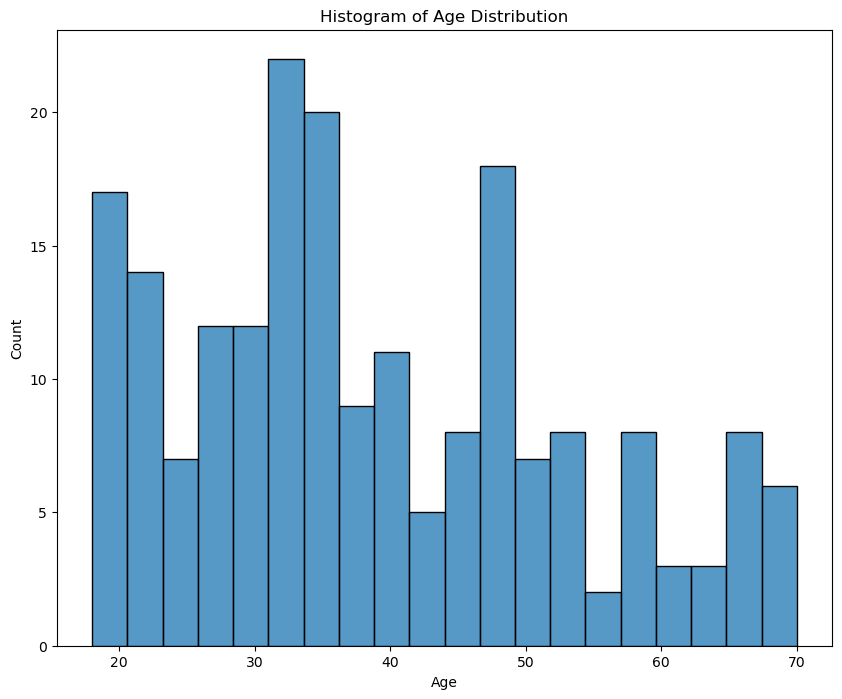

In [30]:
#Plot a histogram of the Age distribution.
plt.figure(figsize=(10,8))
sns.histplot(mall["Age"], bins=20, edgecolor='black')
plt.title("Histogram of Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

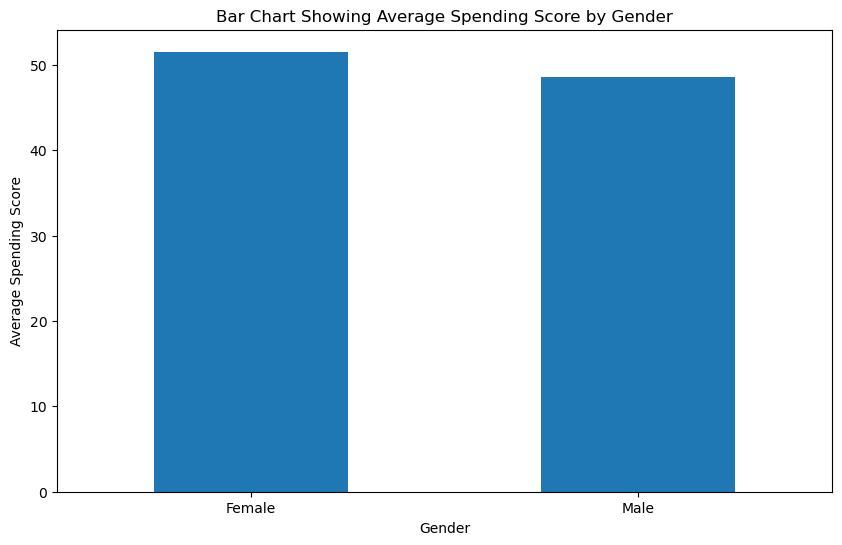

In [31]:
#Create a bar chart of average spending score by gender.
plt.figure(figsize=(10,6))
avg_score_by_gender.plot(kind='bar')
plt.title('Bar Chart Showing Average Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Spending Score')
plt.xticks(rotation=0)
plt.show()

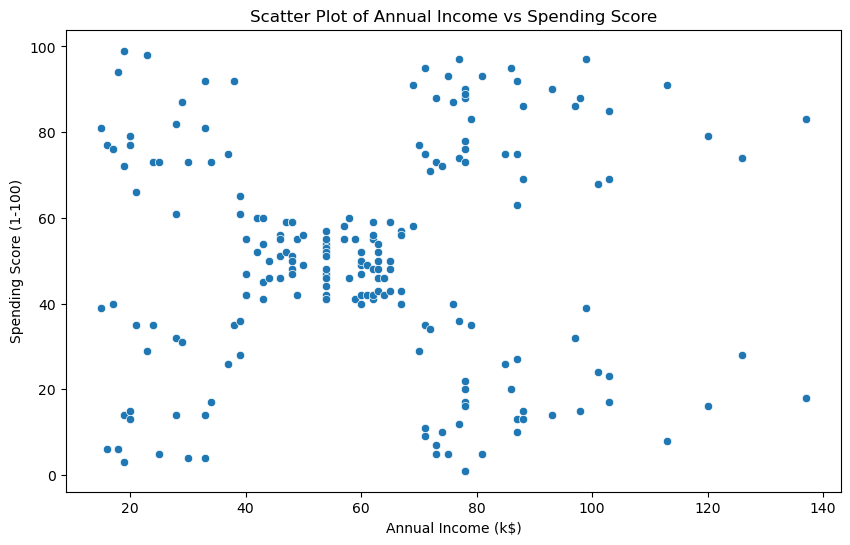

In [32]:
#Create a scatter plot of Annual Income vs Spending Score
plt.figure(figsize=(10,6))
sns.scatterplot(data=mall, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

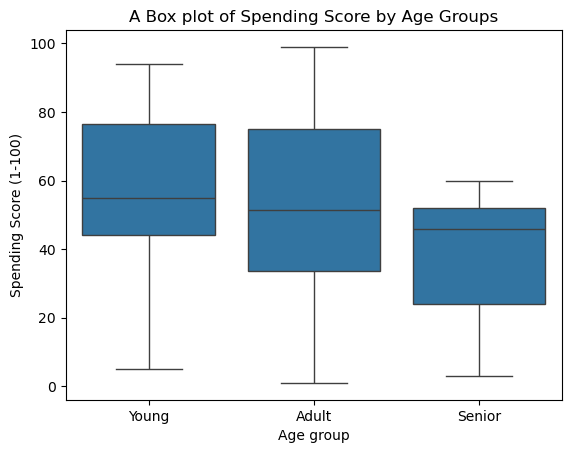

In [33]:
#Create a boxplot of spending score grouped by age bins.
plt.Figure(figsize=(10,6))
sns.boxplot(x='AgeGroup', y='Spending Score (1-100)', data =mall)
plt.title("A Box plot of Spending Score by Age Groups")
plt.xlabel("Age group")
plt.ylabel("Spending Score (1-100)")
plt.show()

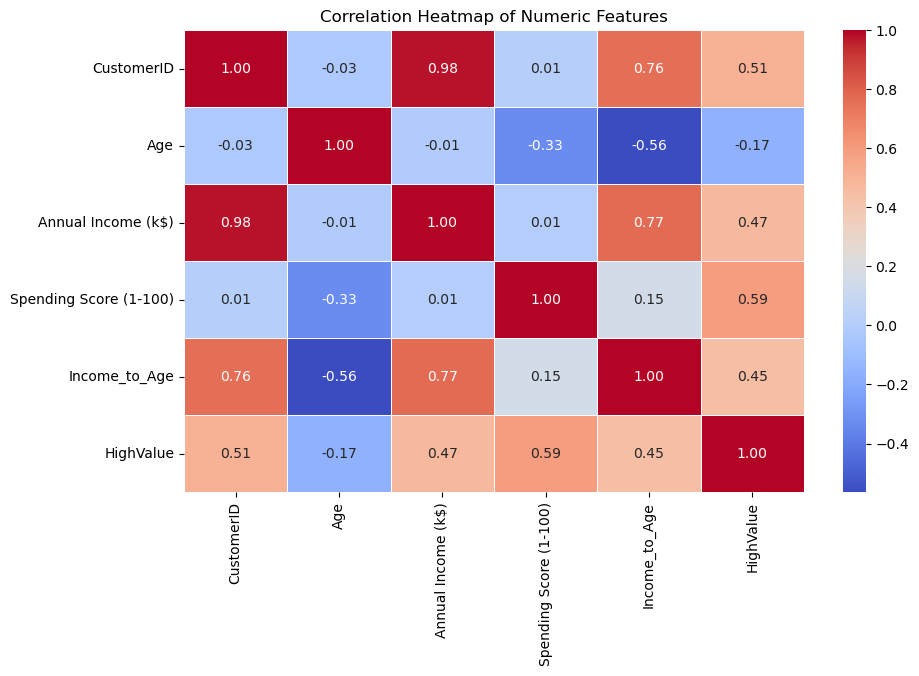

In [34]:
#Create a heatmap of correlations between numeric features.
correlation = mall.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

### Part E — Dimensionality reduction (PCA & t-SNE) 

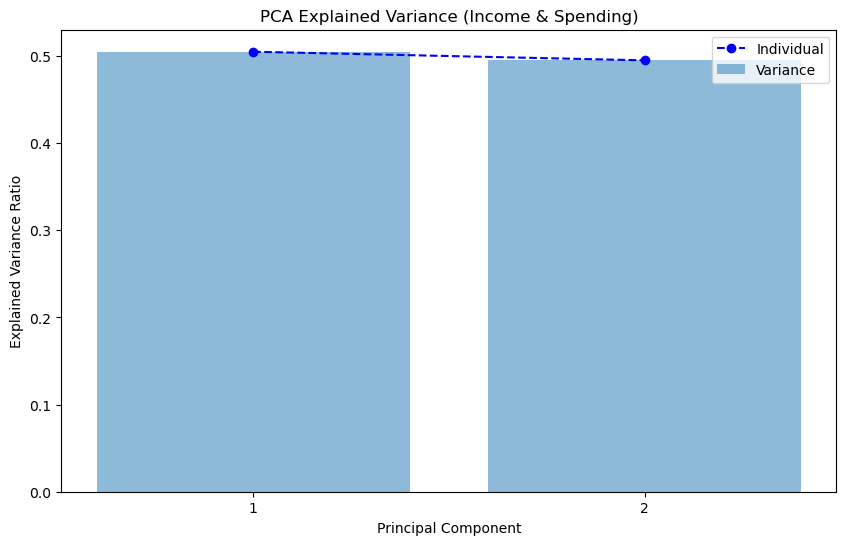

In [35]:
#Run PCA on standardized income and spending features and plot explained variance.
X = mall[['Annual Income (k$)', 'Spending Score (1-100)']]
#standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#PCA
pca = PCA()
pca.fit(X_scaled)
#get Explained variance
explained_var = pca.explained_variance_ratio_
#plot explained variance
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_var)+1), explained_var, marker="o", linestyle="--", color="b", label="Individual")
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.5, align="center", label="Variance")
plt.title("PCA Explained Variance (Income & Spending)")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1, len(explained_var)+1))
plt.legend()
plt.show()



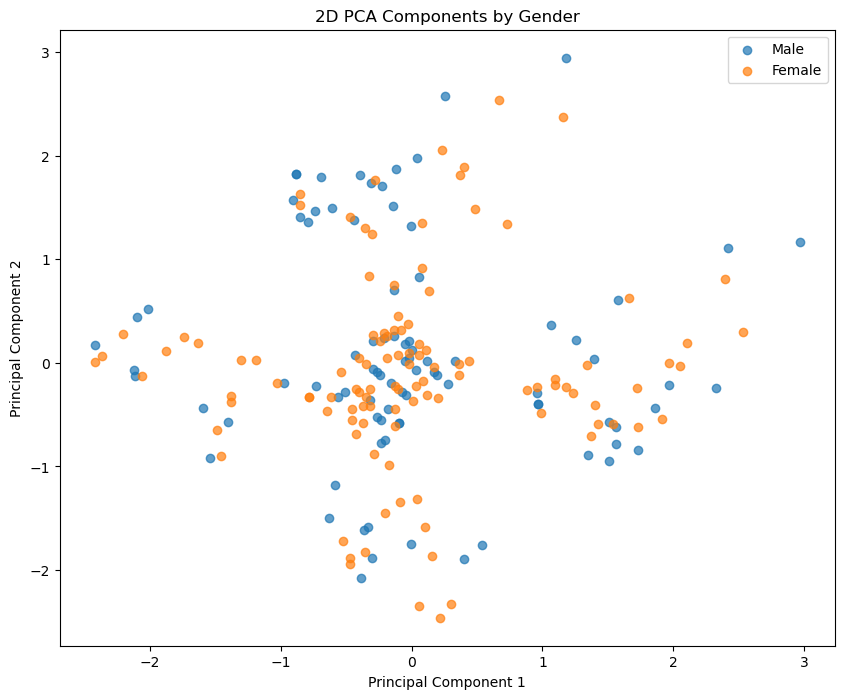

In [36]:
#Plot 2D PCA components scatter colored by a category (e.g., Gender)
#PCA dataframe
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_scaled), columns=['PCA1', 'PCA2'])
X_pca['Gender'] = mall['Gender'].values
#plot scatter colored by gender
plt.figure(figsize=(10,8))
for gender in X_pca['Gender'].unique():
    subset = X_pca[X_pca['Gender'] == gender]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=gender, alpha=0.7)

plt.title('2D PCA Components by Gender')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

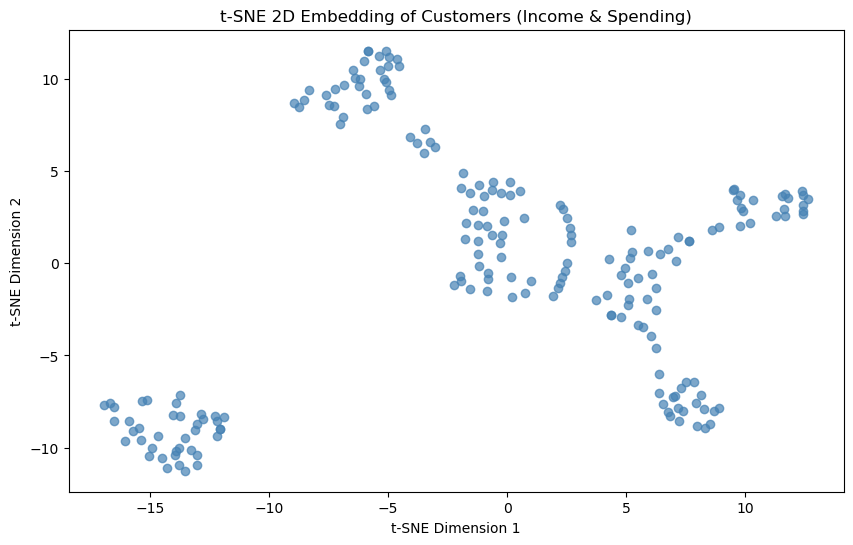

In [37]:
#Run t-SNE and plot the 2D embedding.
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = pd.DataFrame(tsne.fit_transform(X_scaled), columns=['TSNE1', 'TSNE2'])

#plot t_SNE scatter
plt.figure(figsize=(10,6))
plt.scatter(X_tsne["TSNE1"], X_tsne["TSNE2"], alpha=0.7, color="steelblue")
plt.title("t-SNE 2D Embedding of Customers (Income & Spending)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


In [38]:
#Compare PCA and t-SNE plots — which shows clearer clusters?

- PCA plot usually shows customers arranged along axes that reflect income & spending variation. You’ll see some spread but clusters won’t be very distinct.   
- t-SNE plot typically reveals more distinct, blob-like clusters, often aligning with customer segments (e.g., high spenders vs. low-income groups).   
- t-SNE shows clearer clusters, but PCA is easier to interpret and reproducible.

### Part F — Clustering & evaluation 

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

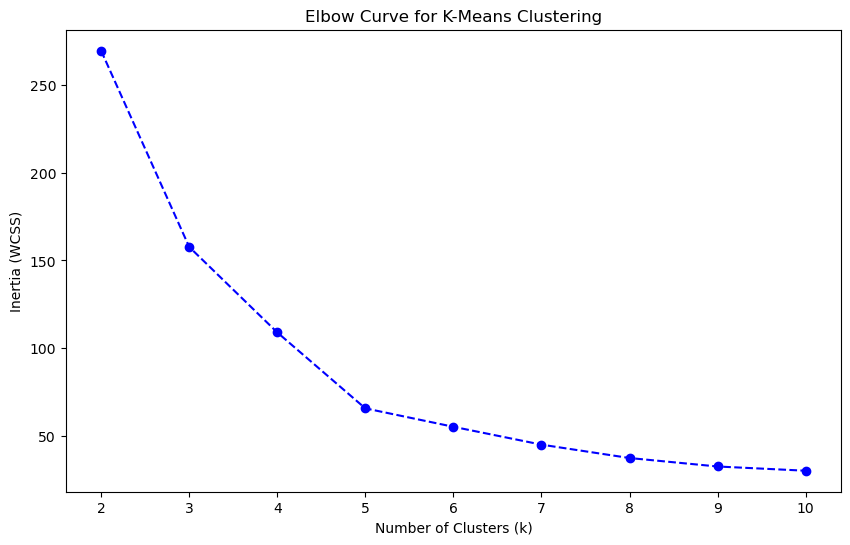

In [39]:
#Run k-means for k=2…10 on standardized features and plot the elbow curve
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

#plot the elbow curve
plt.figure(figsize=(10,6))
plt.plot(K, inertia, marker="o", linestyle="--", color="b")
plt.title("Elbow Curve for K-Means Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.xticks(K)
plt.show()

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

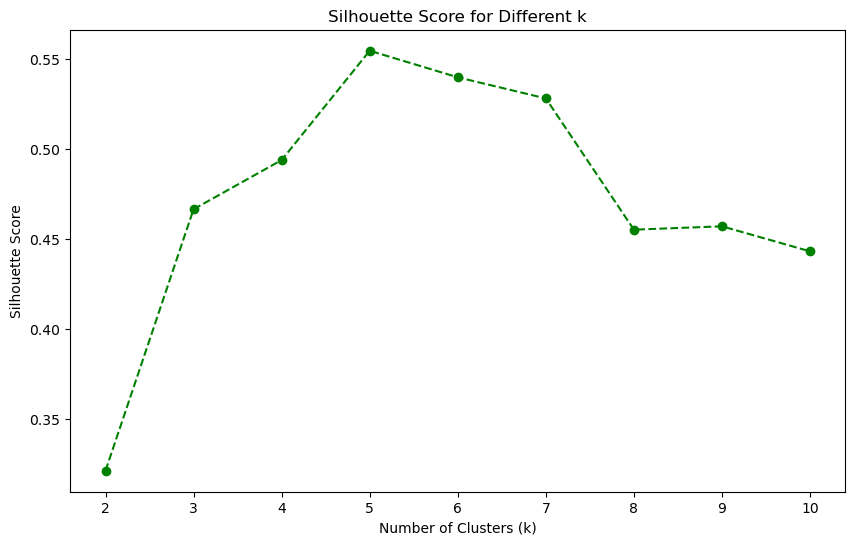

Best k based on silhouette score: 5


In [40]:
#Compute silhouette score for each k and identify the best k
# Compute silhouette scores for k=2…10
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

# Identify best k
best_k = K[sil_scores.index(max(sil_scores))]

# Plot silhouette scores
plt.figure(figsize=(10,6))
plt.plot(K, sil_scores, marker="o", linestyle="--", color="g")
plt.title("Silhouette Score for Different k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(K)
plt.show()

print("Best k based on silhouette score:", best_k)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


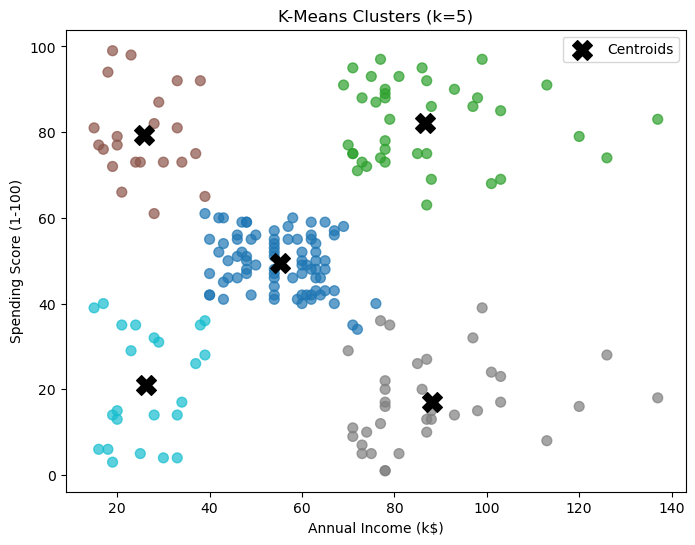

In [47]:
#Plot clusters for the chosen k using a scatter plot.
#KMeans with best k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
mall["KMCluster"] = kmeans.fit_predict(X_scaled)

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(mall["Annual Income (k$)"], mall["Spending Score (1-100)"],
            c=mall["KMCluster"], cmap="tab10", s=50, alpha=0.7)

# Plot cluster centers (unscaled back to original feature space)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], c="black", s=200, marker="X", label="Centroids")

plt.title(f"K-Means Clusters (k={best_k})")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

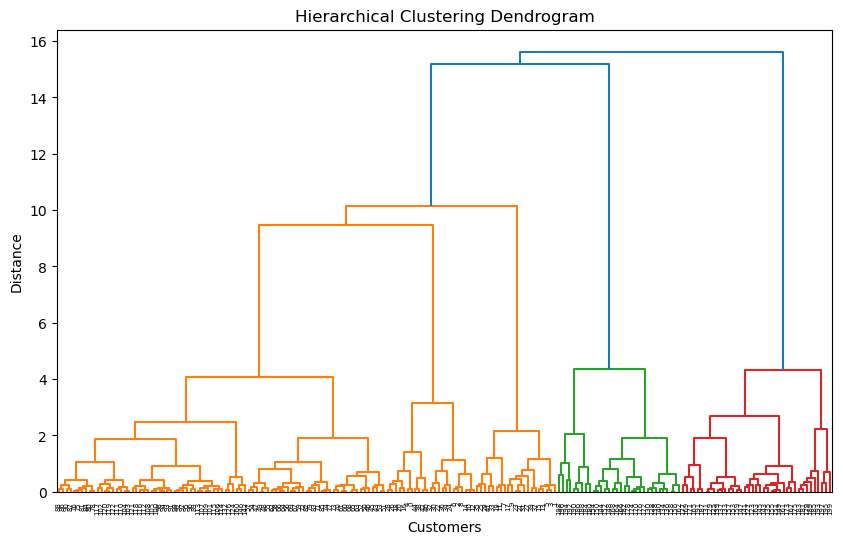

In [ ]:
#Run hierarchical clustering and visualize a dendrogram.
# Perform hierarchical clustering
linked = linkage(X_scaled, method="ward")

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, 
           orientation="top",
           distance_sort="descending",
           show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

Comparison of K_Means and Hierarchical Clusters:
 HCluster    0   1   2   3   4
KMCluster                    
0           0   0   0   0  81
1          39   0   0   0   0
2           0   0  21   0   1
3           0  32   0   0   3
4           0   0   0  23   0


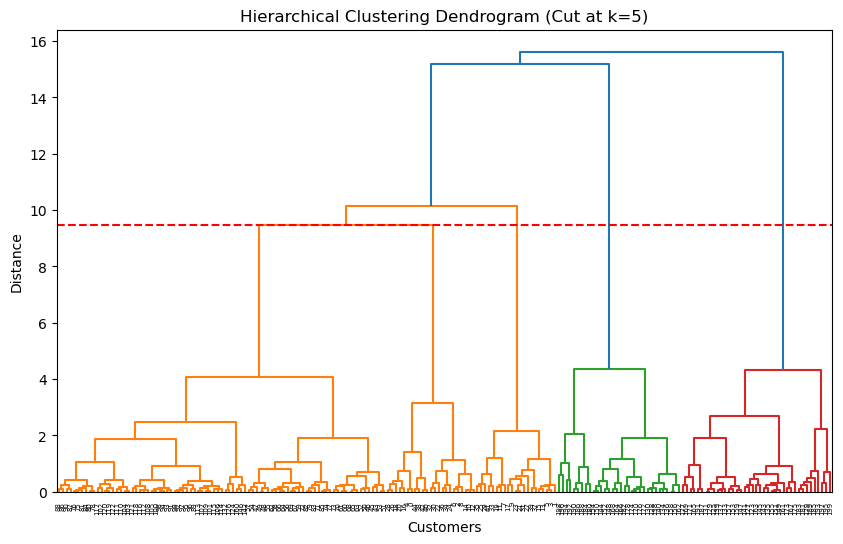

In [51]:
#Cut the dendrogram at k clusters and compare with k-means.
linked = linkage(X_scaled, method='ward')
mall['HCluster'] = fcluster(linked, best_k, criterion='maxclust')-1
#compare clusters
comparison = pd.crosstab(mall['KMCluster'], mall['HCluster'])
print("Comparison of K_Means and Hierarchical Clusters:\n", comparison)

plt.figure(figsize=(10,6))
dendrogram(linked, 
           orientation="top",
           distance_sort="descending",
           show_leaf_counts=False)
plt.axhline(y=linked[-(best_k-1),2], color="red", linestyle="--")  #horizontal cut line
plt.title(f"Hierarchical Clustering Dendrogram (Cut at k={best_k})")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

In [53]:
#Profile each cluster: average age, income, spending score.
cluster_profile = mall.groupby('KMCluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_profile

,Age,Annual Income (k$),Spending Score (1-100)
KMCluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [54]:
#Check cluster sizes — are some clusters too small?
cluster_sizes = mall['KMCluster'].value_counts().sort_index()
cluster_sizes

KMCluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64

In [55]:
#Run k-means with different random states and see if cluster assignments change
cluster_assigns = {}
for seed in [0, 42, 99, 123]:
    kmeans = KMeans(n_clusters=best_k, random_state=seed, n_init=10)
    cluster_assigns[seed] = kmeans.fit_predict(X_scaled)

Assigns_comparison = pd.DataFrame(cluster_assigns)
Assigns_comparison.head()

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

,0,42,99,123
0,3,4,3,4
1,4,2,4,3
2,3,4,3,4
3,4,2,4,3
4,3,4,3,4


In [57]:
#Export the dataset with cluster labels to CSV.
mall.to_csv("mall_clusters", columns=['KMCluster', 'HCluster'], index=False)